<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/Reddes_Neuronales_Artificiales_Introducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccción a las redes neuronales artificiales

Las [redes neuronales artificiales](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-14e5c02bafe) (también conocidas como sistemas conexionistas) son un modelo computacional vagamente inspirado en el comportamiento observado en su homólogo biológico. Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

>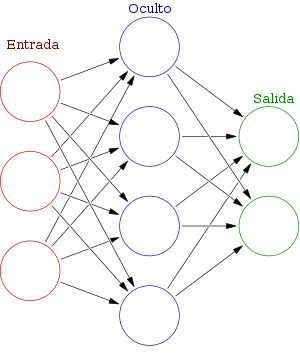


La neurona de [McCulloch-Pitts](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1) es una unidad de cálculo que intenta modelar el comportamiento de una neurona "natural", similares a las que constituyen del cerebro humano. Ella es la unidad esencial con la cual se construye una red neuronal artificial.

El resultado del cálculo en una neurona consiste en realizar una suma ponderada de las entradas, seguida de la aplicación de una función no lineal, como se ilustra en la siguiente figura:

>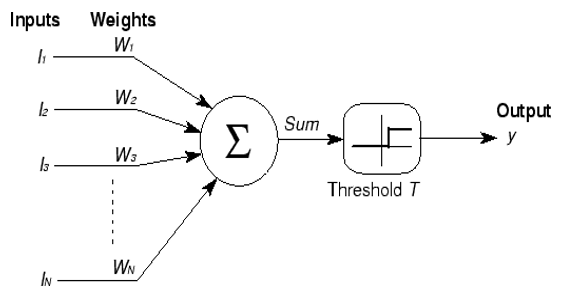

La [teoría Hebbiana](https://es.wikipedia.org/wiki/Teor%C3%ADa_hebbiana) describe un mecanismo básico de plasticidad sináptica en el que el valor de una conexión sináptica se incrementa si las neuronas de ambos lados de dicha sinapsis se activan repetidas veces de forma simultánea. Introducida por Donald Hebb, en 1949, es también llamada regla de Hebb, postulado de aprendizaje de Hebb o Teoría de la Asamblea Celular.

# Cómputo de uan neurona

Basados en los conceptos anteriores se modelan las redesde neuronales artificiales.

Una neurona $i$ es una unidad de cómputo que realiza el cálculo siguiente (donde $x_i$ a $x_j$ es la entrada, los $w_{ij}$ son los pesos que ponderan cada entrada de la unidad i, $f$ es la función escalón como vimos anteriormente, $S$ el valor previo a la aplicación de la función $f$ y $O_i$ la salida al cómputo de la unidad $i$):

>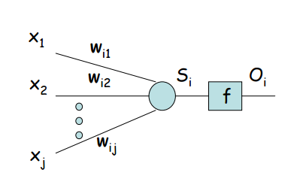

>$S_i=\sum_{j}^{} x_jw_{ij}$
>
>$O_i = 1$ si $S_i>=0$ y $-1$ si $S_i<0$


# Observaciones

1. Puede tanbién existir un valor umbrbal (bias) $\Theta\$ de tal manera que la función quede definida como en el siguiente gráfico:

>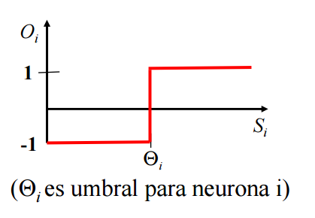

Sería equivalente a considerar un término más de bias al realizar la suma en el cálculo de $S_i$ y considerar la fucnión escalón original, de la siguiente manera

>$S_i=\sum_{j}^{} x_jw_{ij}+b_i$

Y esto es equivalente a tener un input más en -1 con un peso igual al umbral como veremos se calculará en el ejemplo siguiente


2. También la función escalón puece definirse entre 0 y 1



Supongamos que quiero una red que compute la función AND o una función OR de acuerdo a la tabla de verdad de la columna izquierda.

>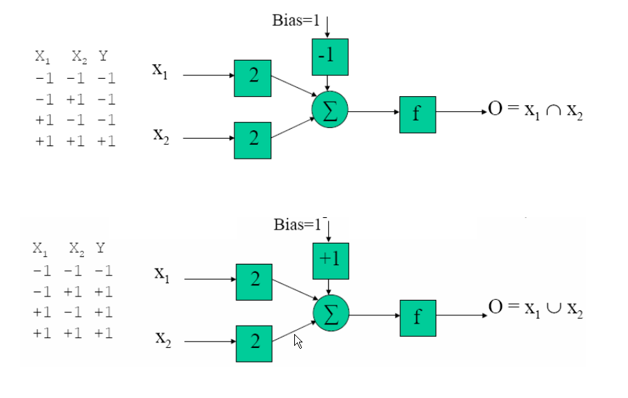


Para la función AND esto sería

In [28]:
import numpy as np
#Función escalón
escalon = lambda x: 1 if x>=0 else -1
#Se agrega el bias como un pesos más en 1 y un input más en -1 para cada entrada
X=np.array([[-1,-1, -1],[-1,1,-1],[1,-1,-1],[1,1,-1]])
Wi=np.array([2,2,1])
#Producto de X por Wi
Si=np.dot(X,Wi)
#Aplico función escalón a cada elemento de Si
Y=list(map(escalon, Si))
#Obtengo el resultado correcto
print(Y)

[-1, -1, -1, 1]


Esto se puede hacer porque el AND es linealmente separable, no sucede lo mismo con la función XOR

>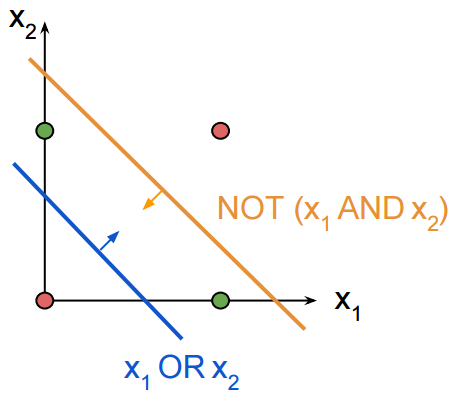